# Assignment 12: Random Forest

## 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, inconsistencies in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel('glass.xlsx')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
num_df = df.select_dtypes(include=['int64'])

In [12]:
#Outliers
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5 * IQR)) |
            (num_df > (Q3 + 1.5 * IQR)))

outliers.sum()

Type    29
dtype: int64

In [16]:
# Data inconsistencies
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [17]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [18]:
df.drop_duplicates(inplace=True)

# 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

In [19]:
num_col = df.columns

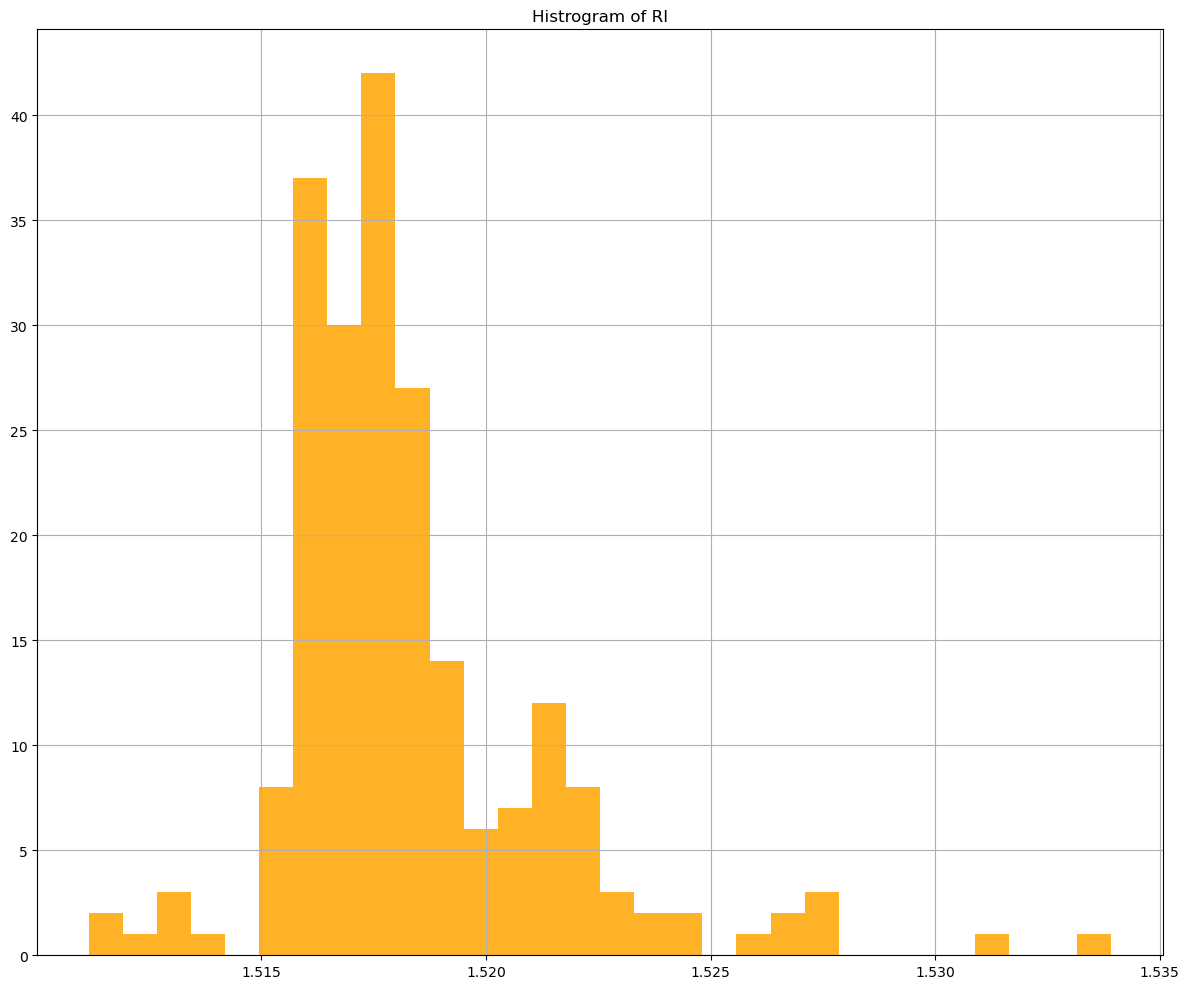

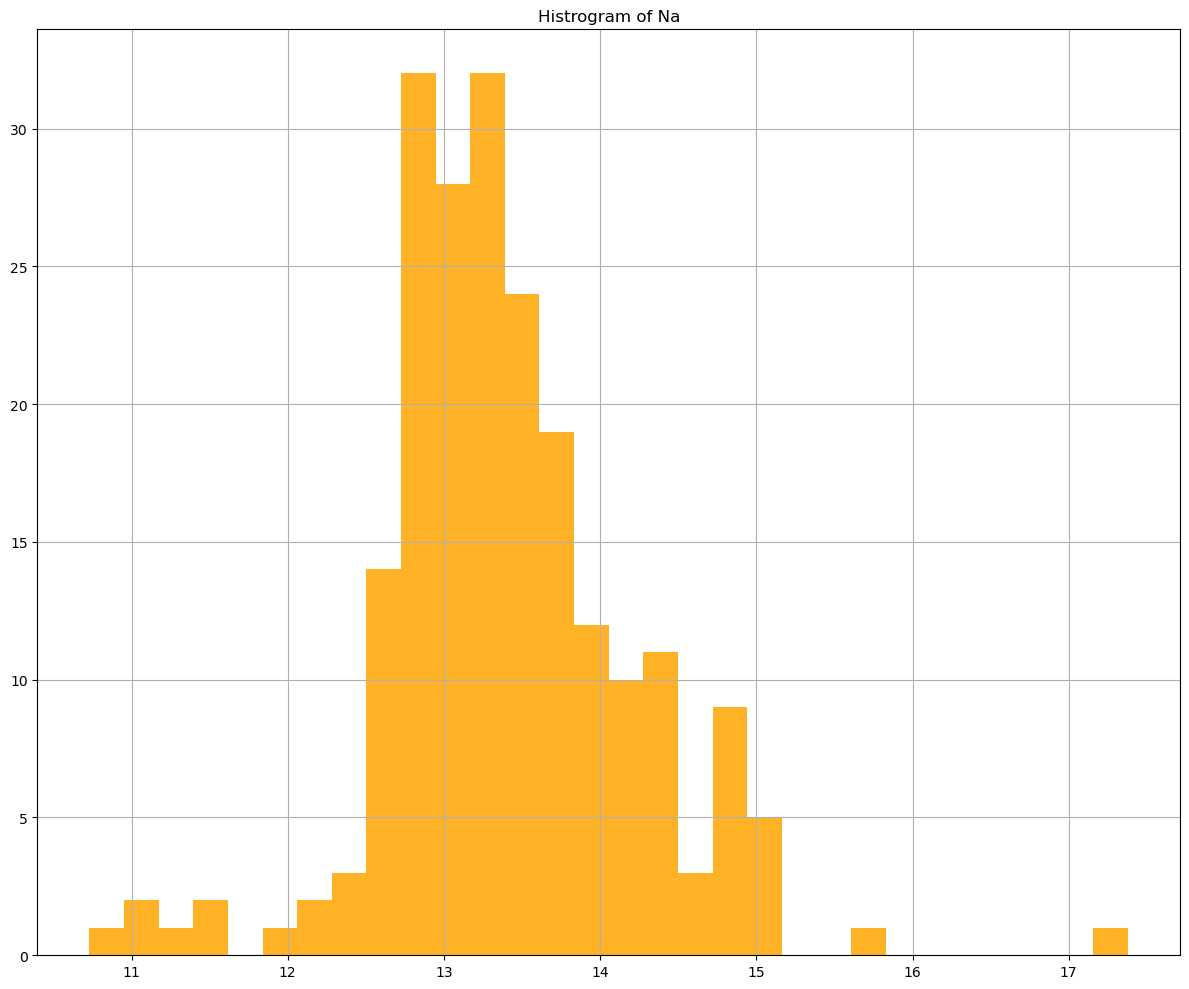

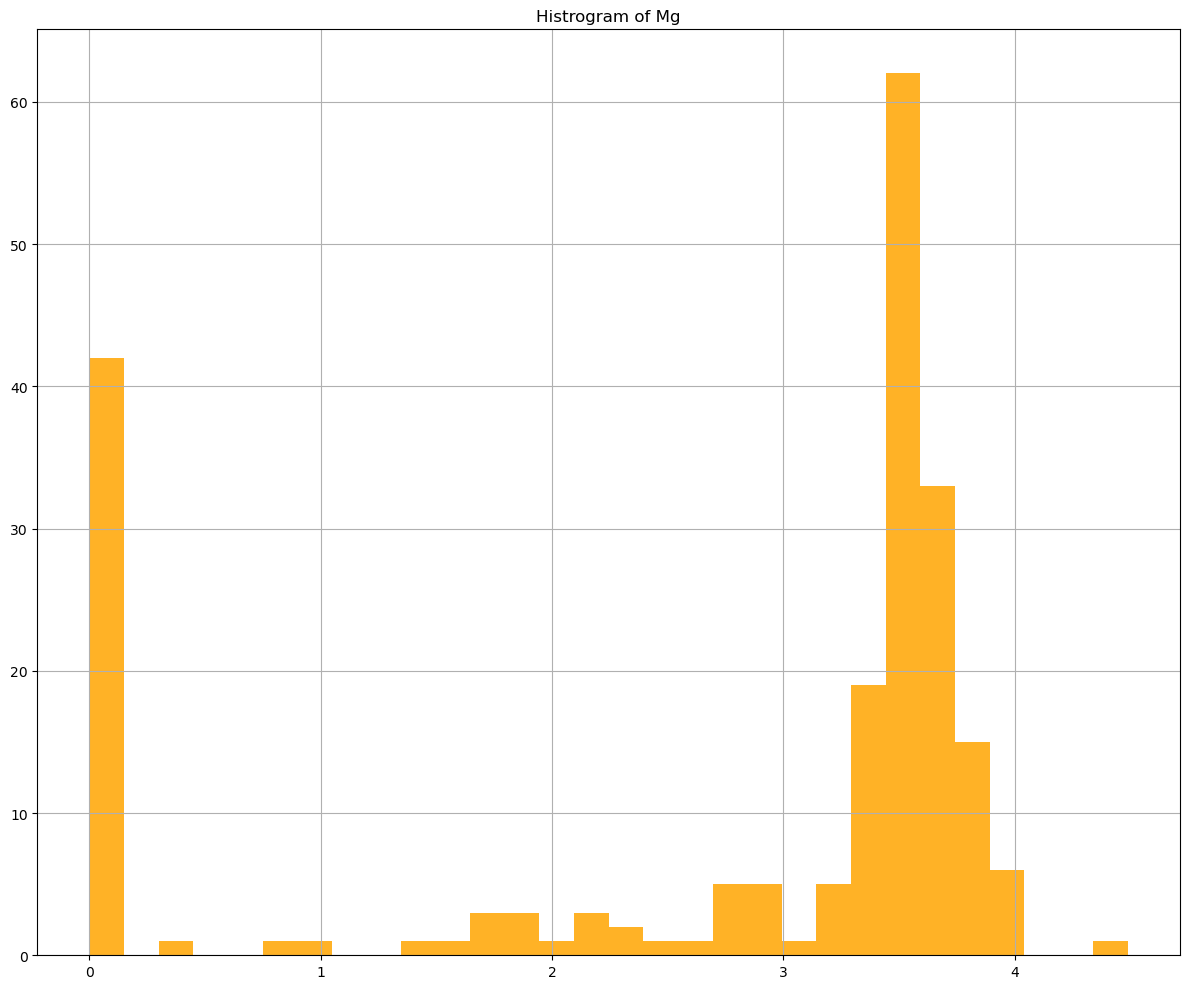

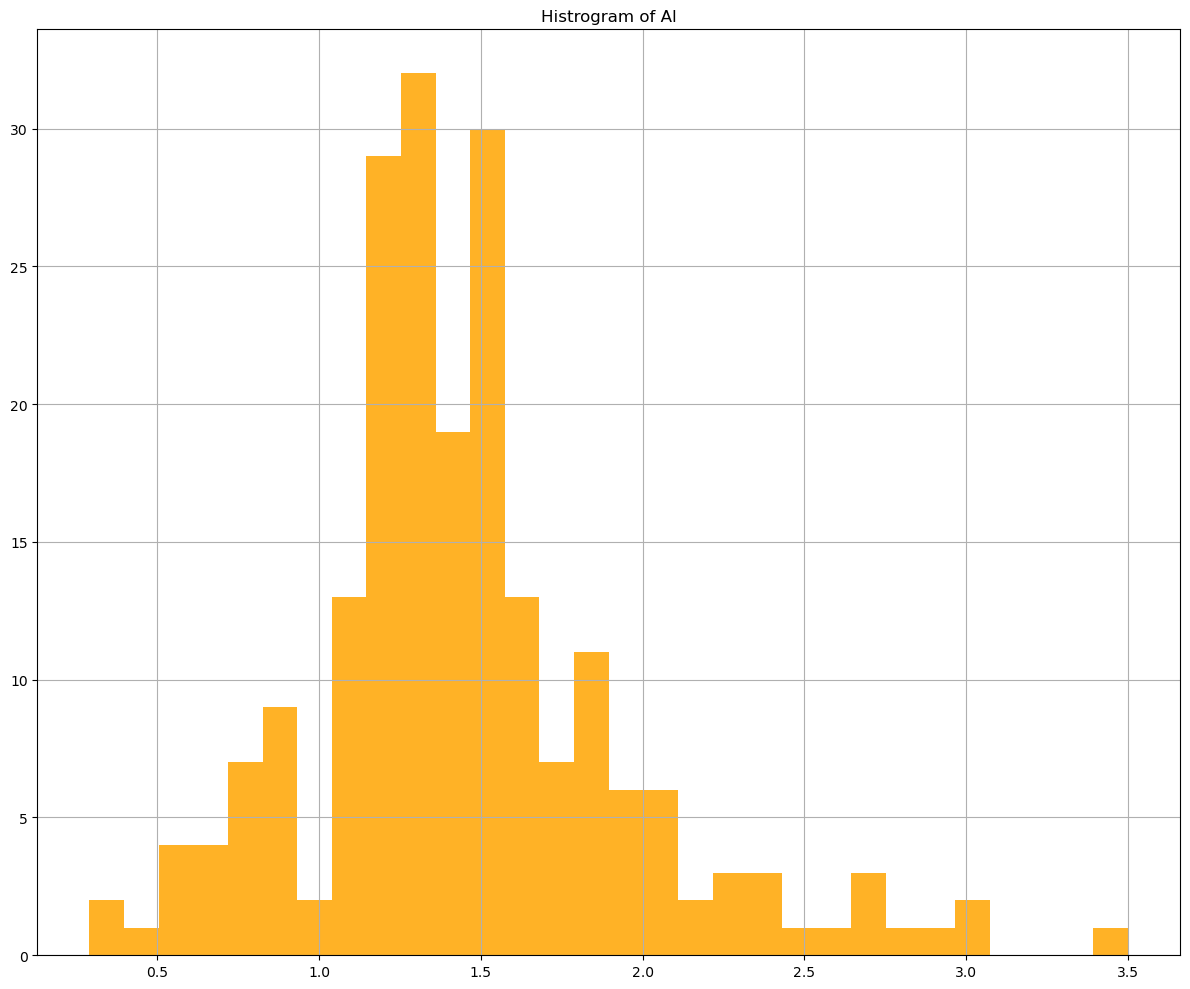

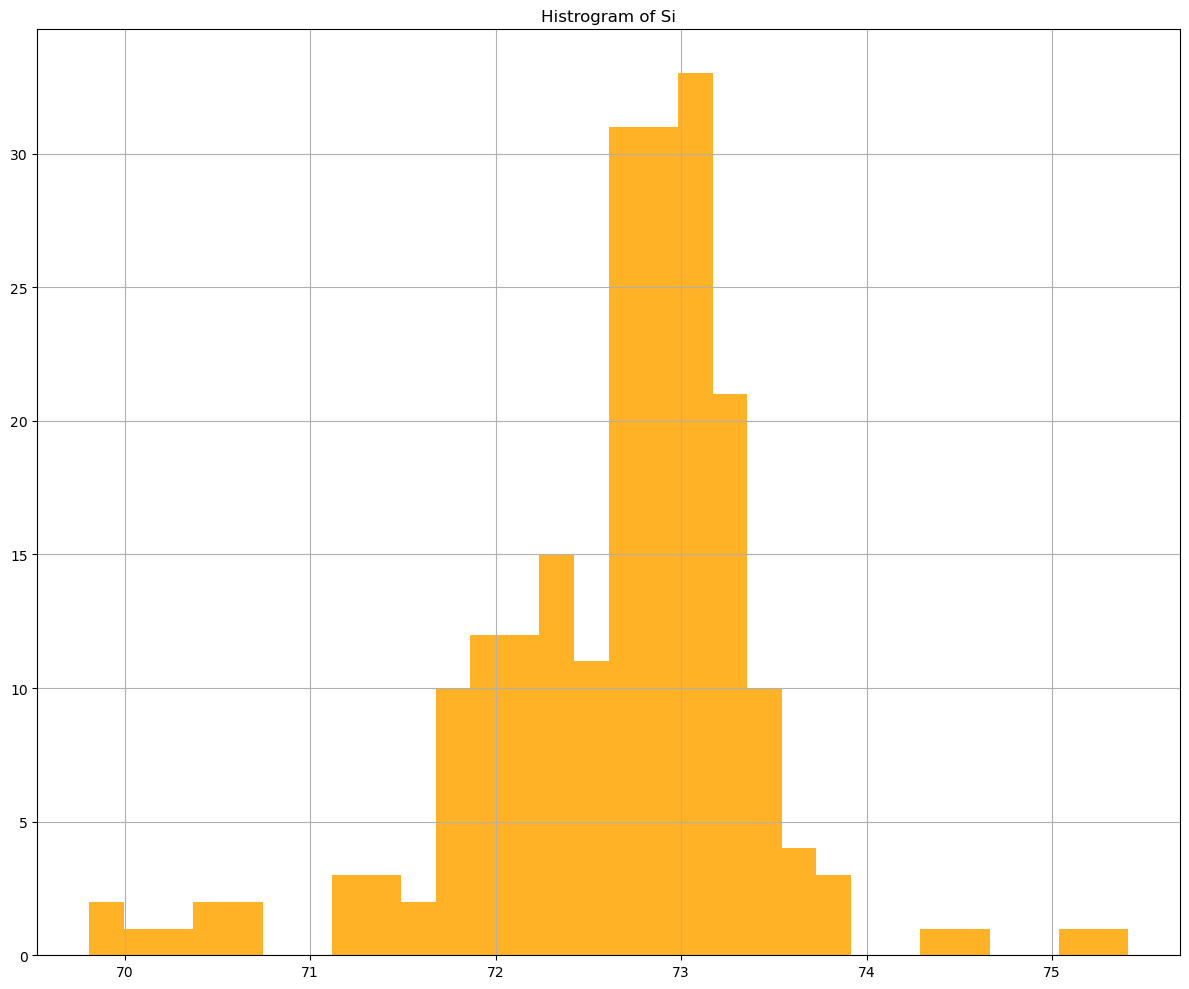

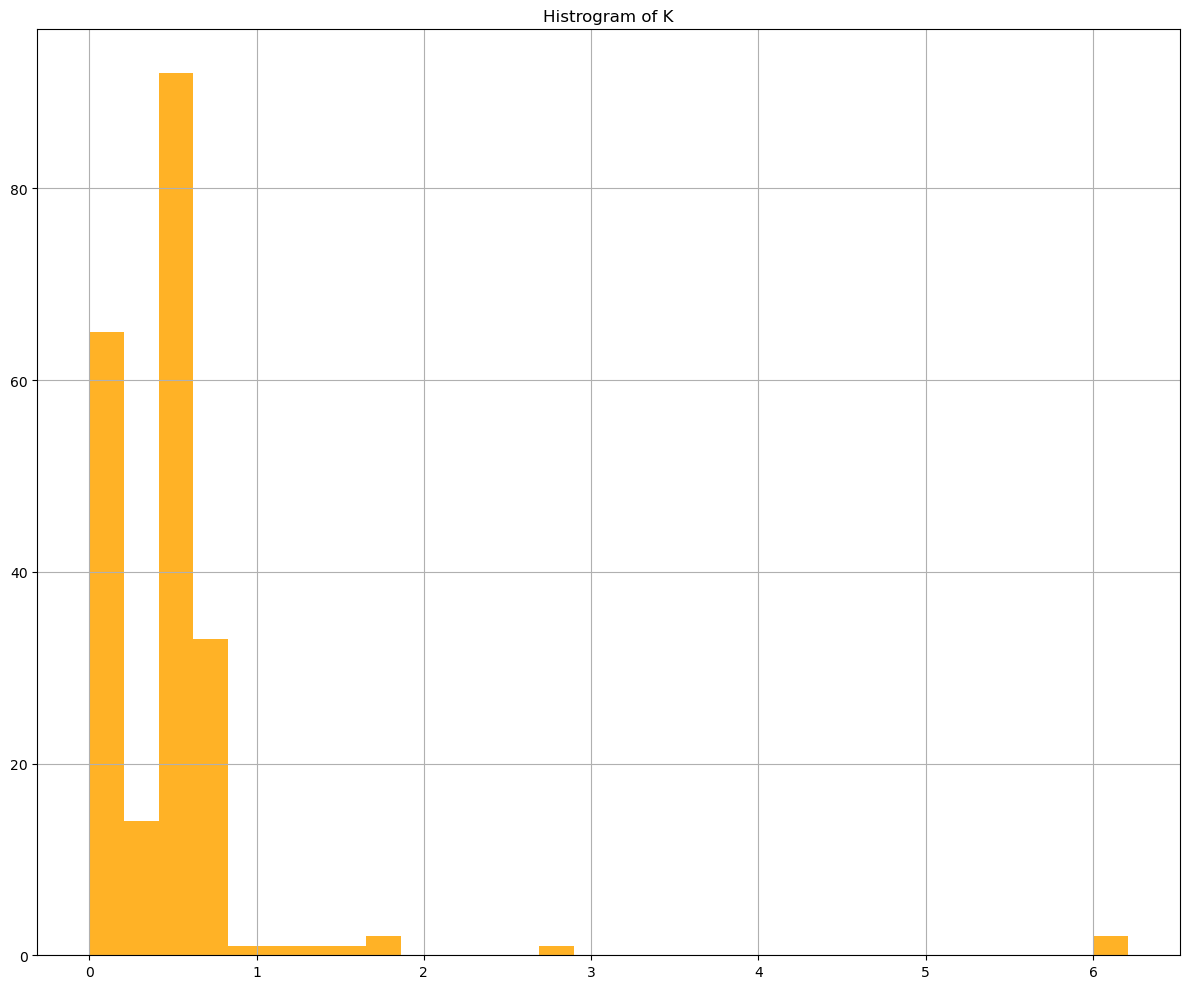

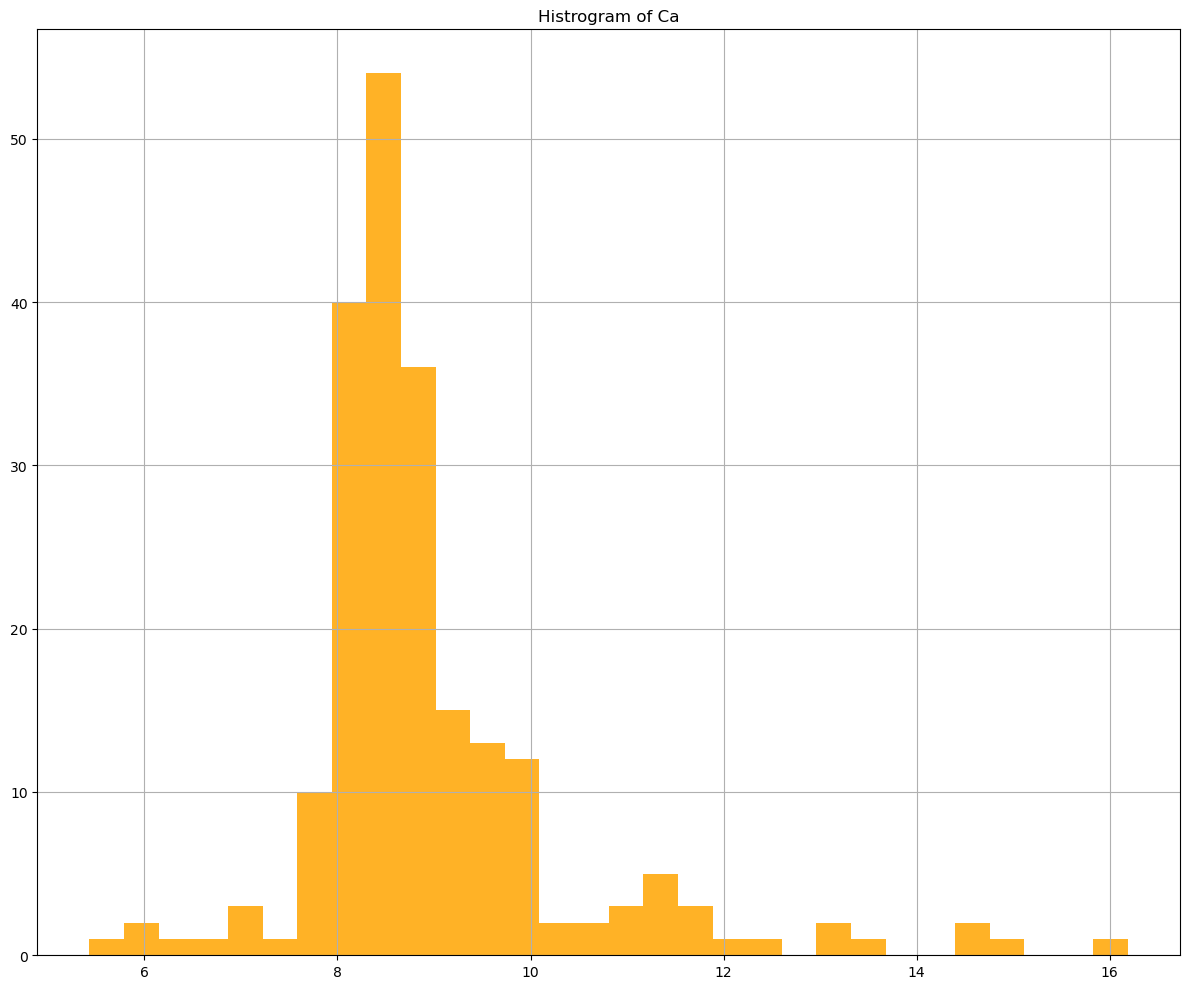

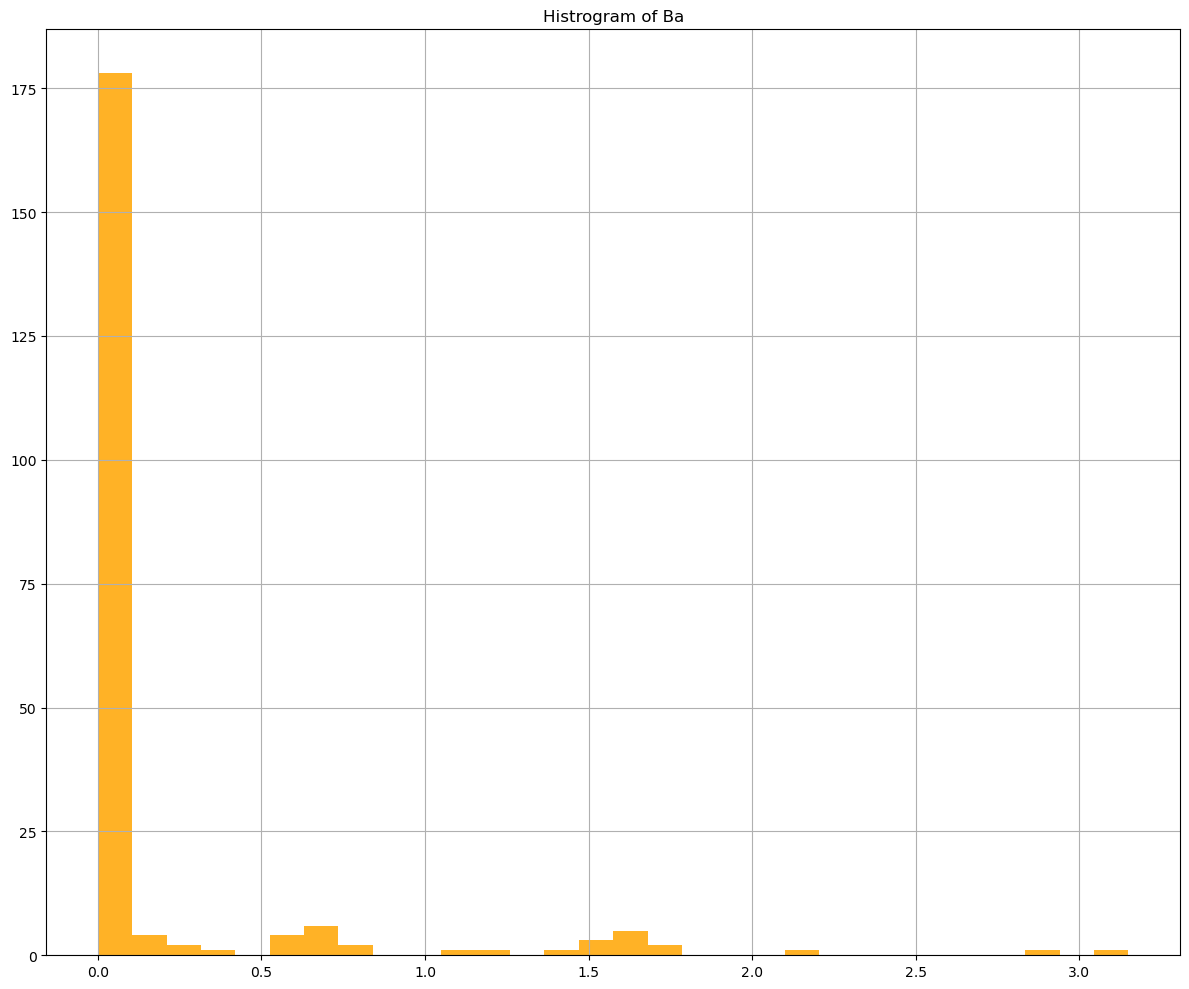

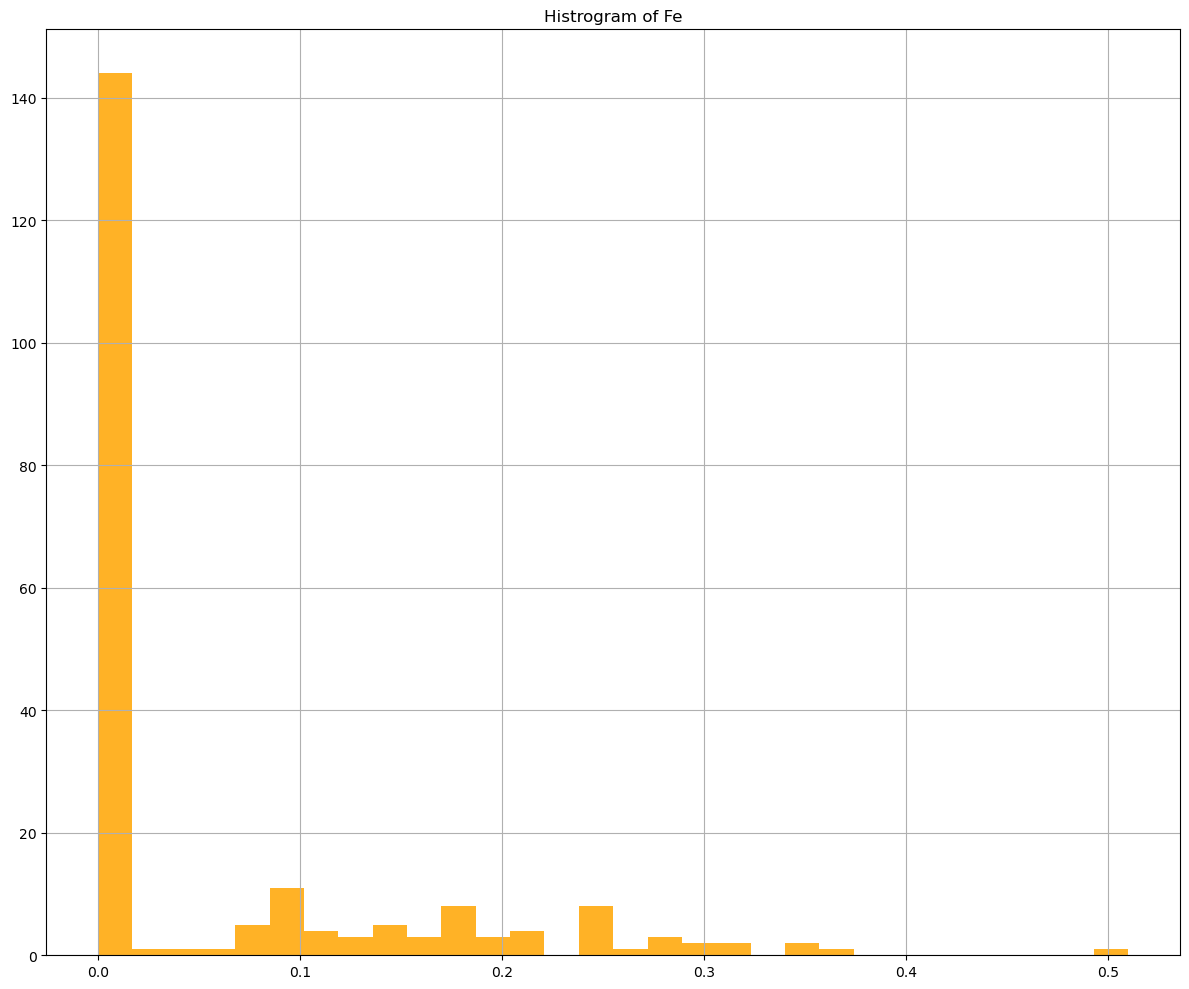

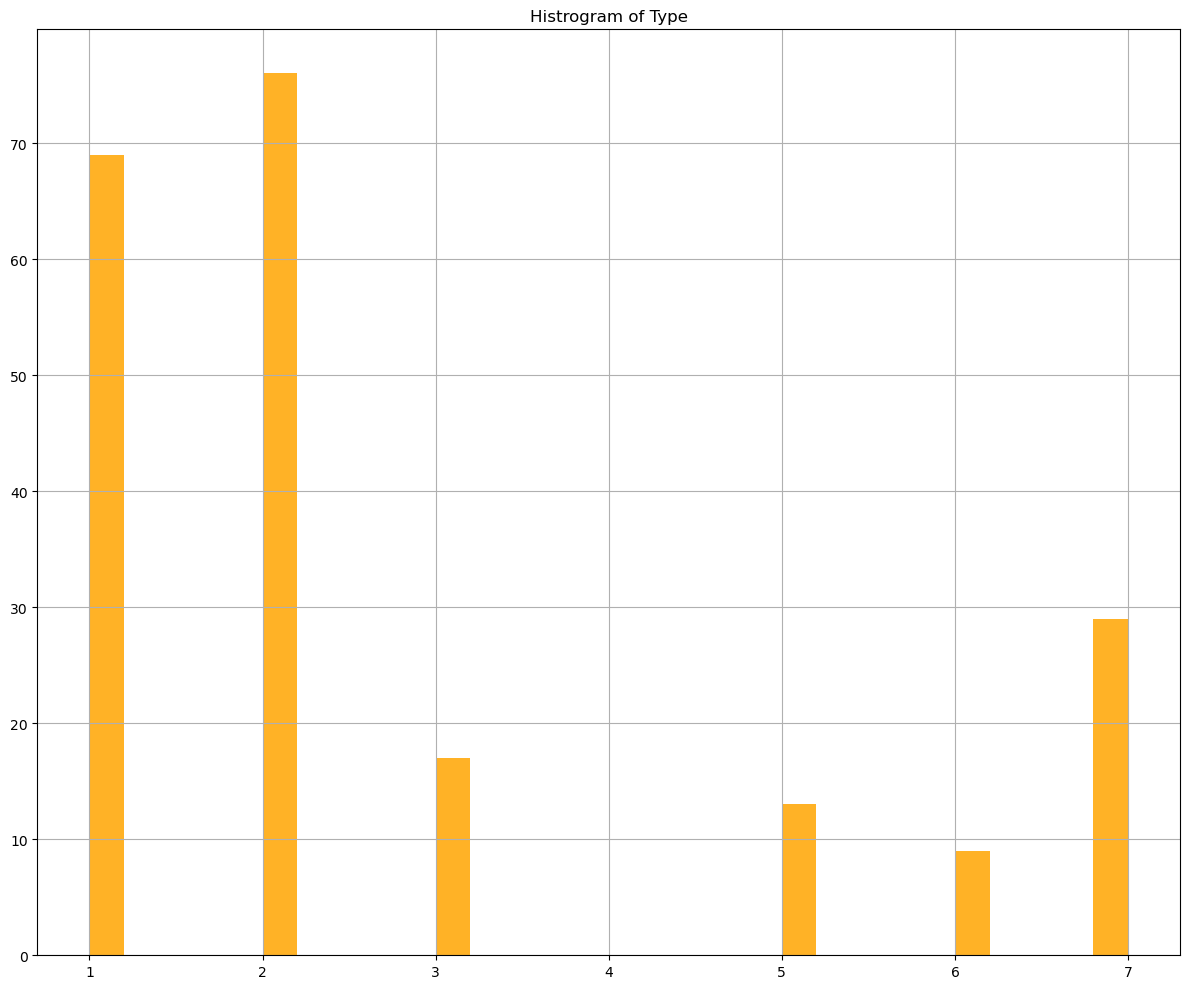

In [24]:
# Histrogram
for col in num_col:
    df[col].hist(figsize=(12,10), bins=30, alpha=0.85, color='orange')
    plt.title(f'Histrogram of {col}')
    plt.tight_layout()
    plt.show()

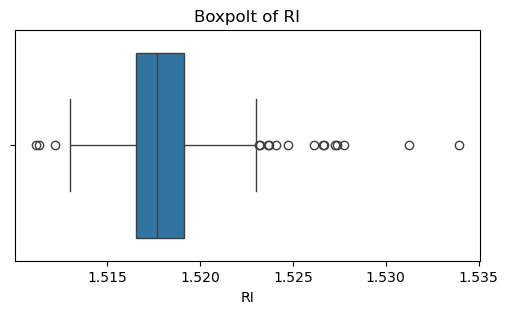

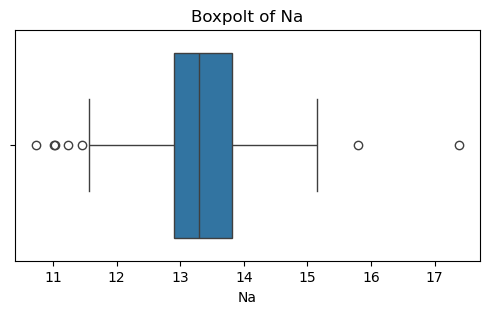

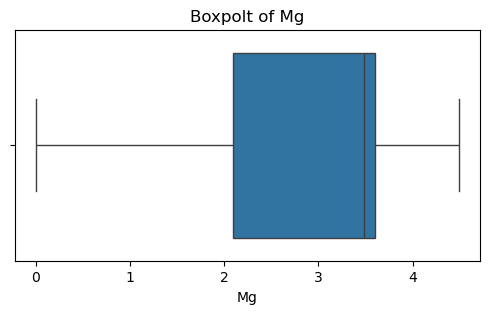

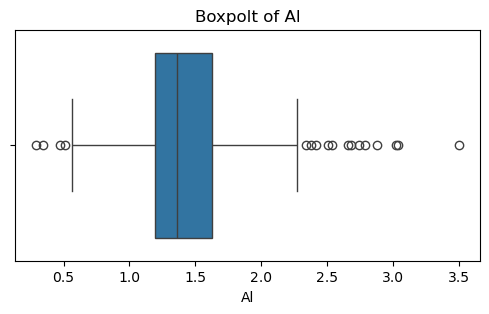

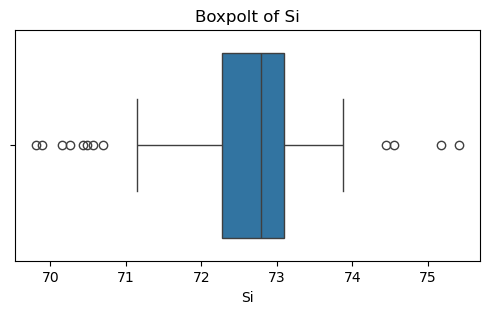

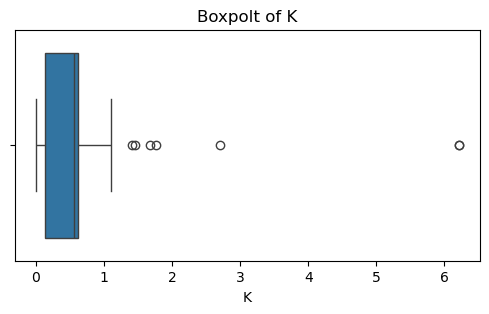

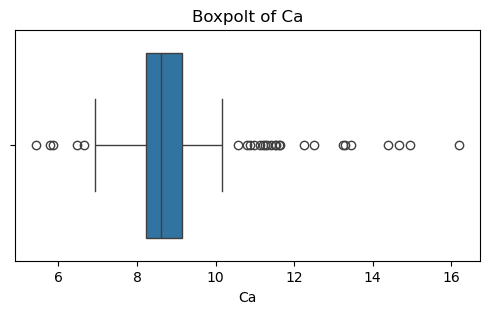

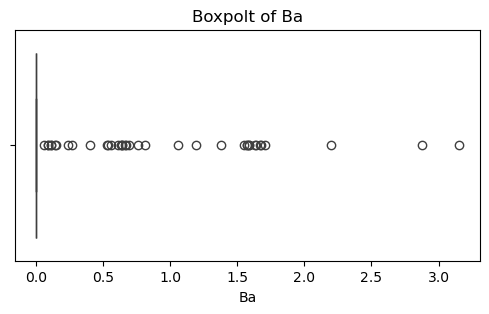

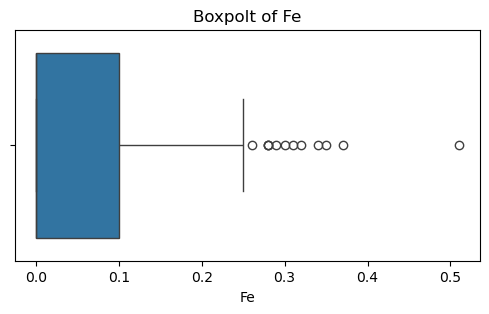

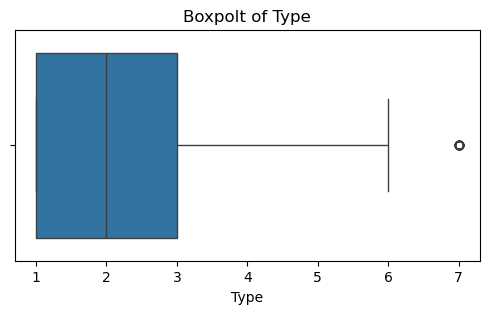

In [26]:
# Boxplot
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxpolt of {col}")
    plt.show()

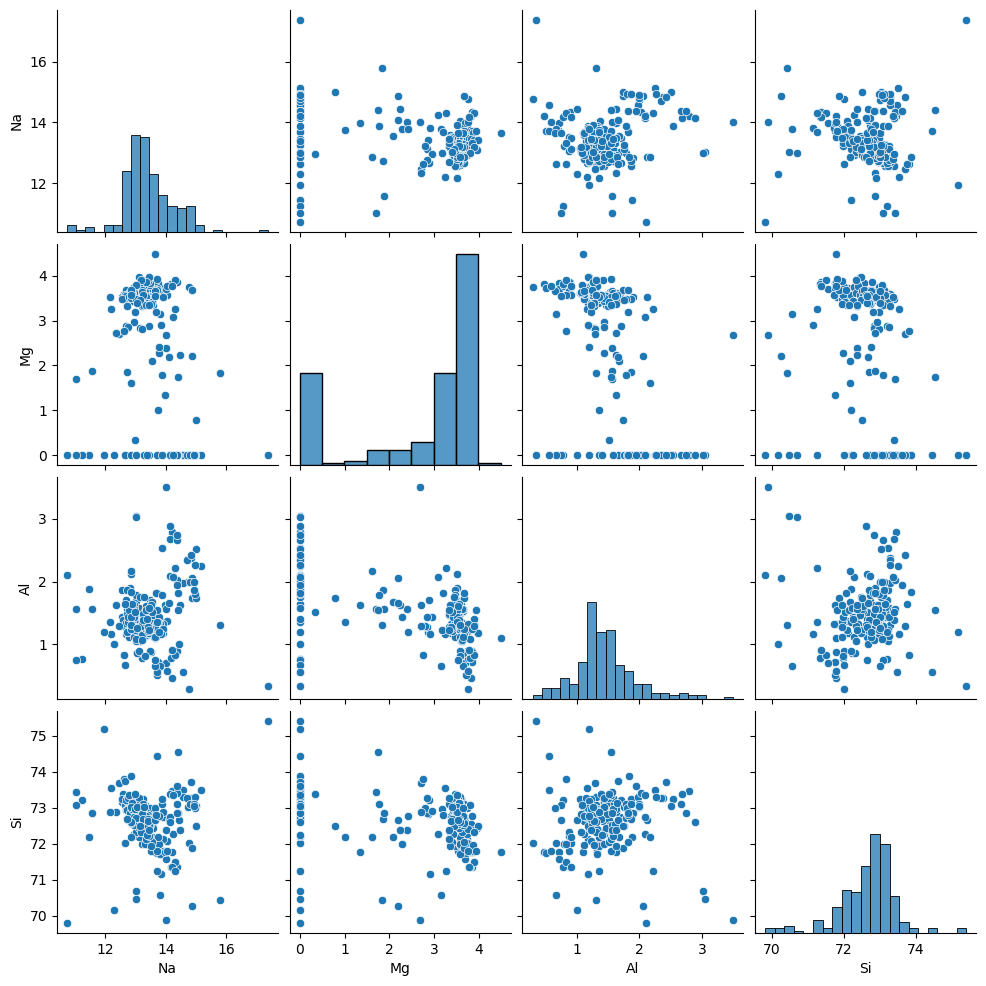

In [38]:
#Pair Plot
cols = ['Na', 'Mg','Al','Si']
sns.pairplot(df[cols])
plt.show()

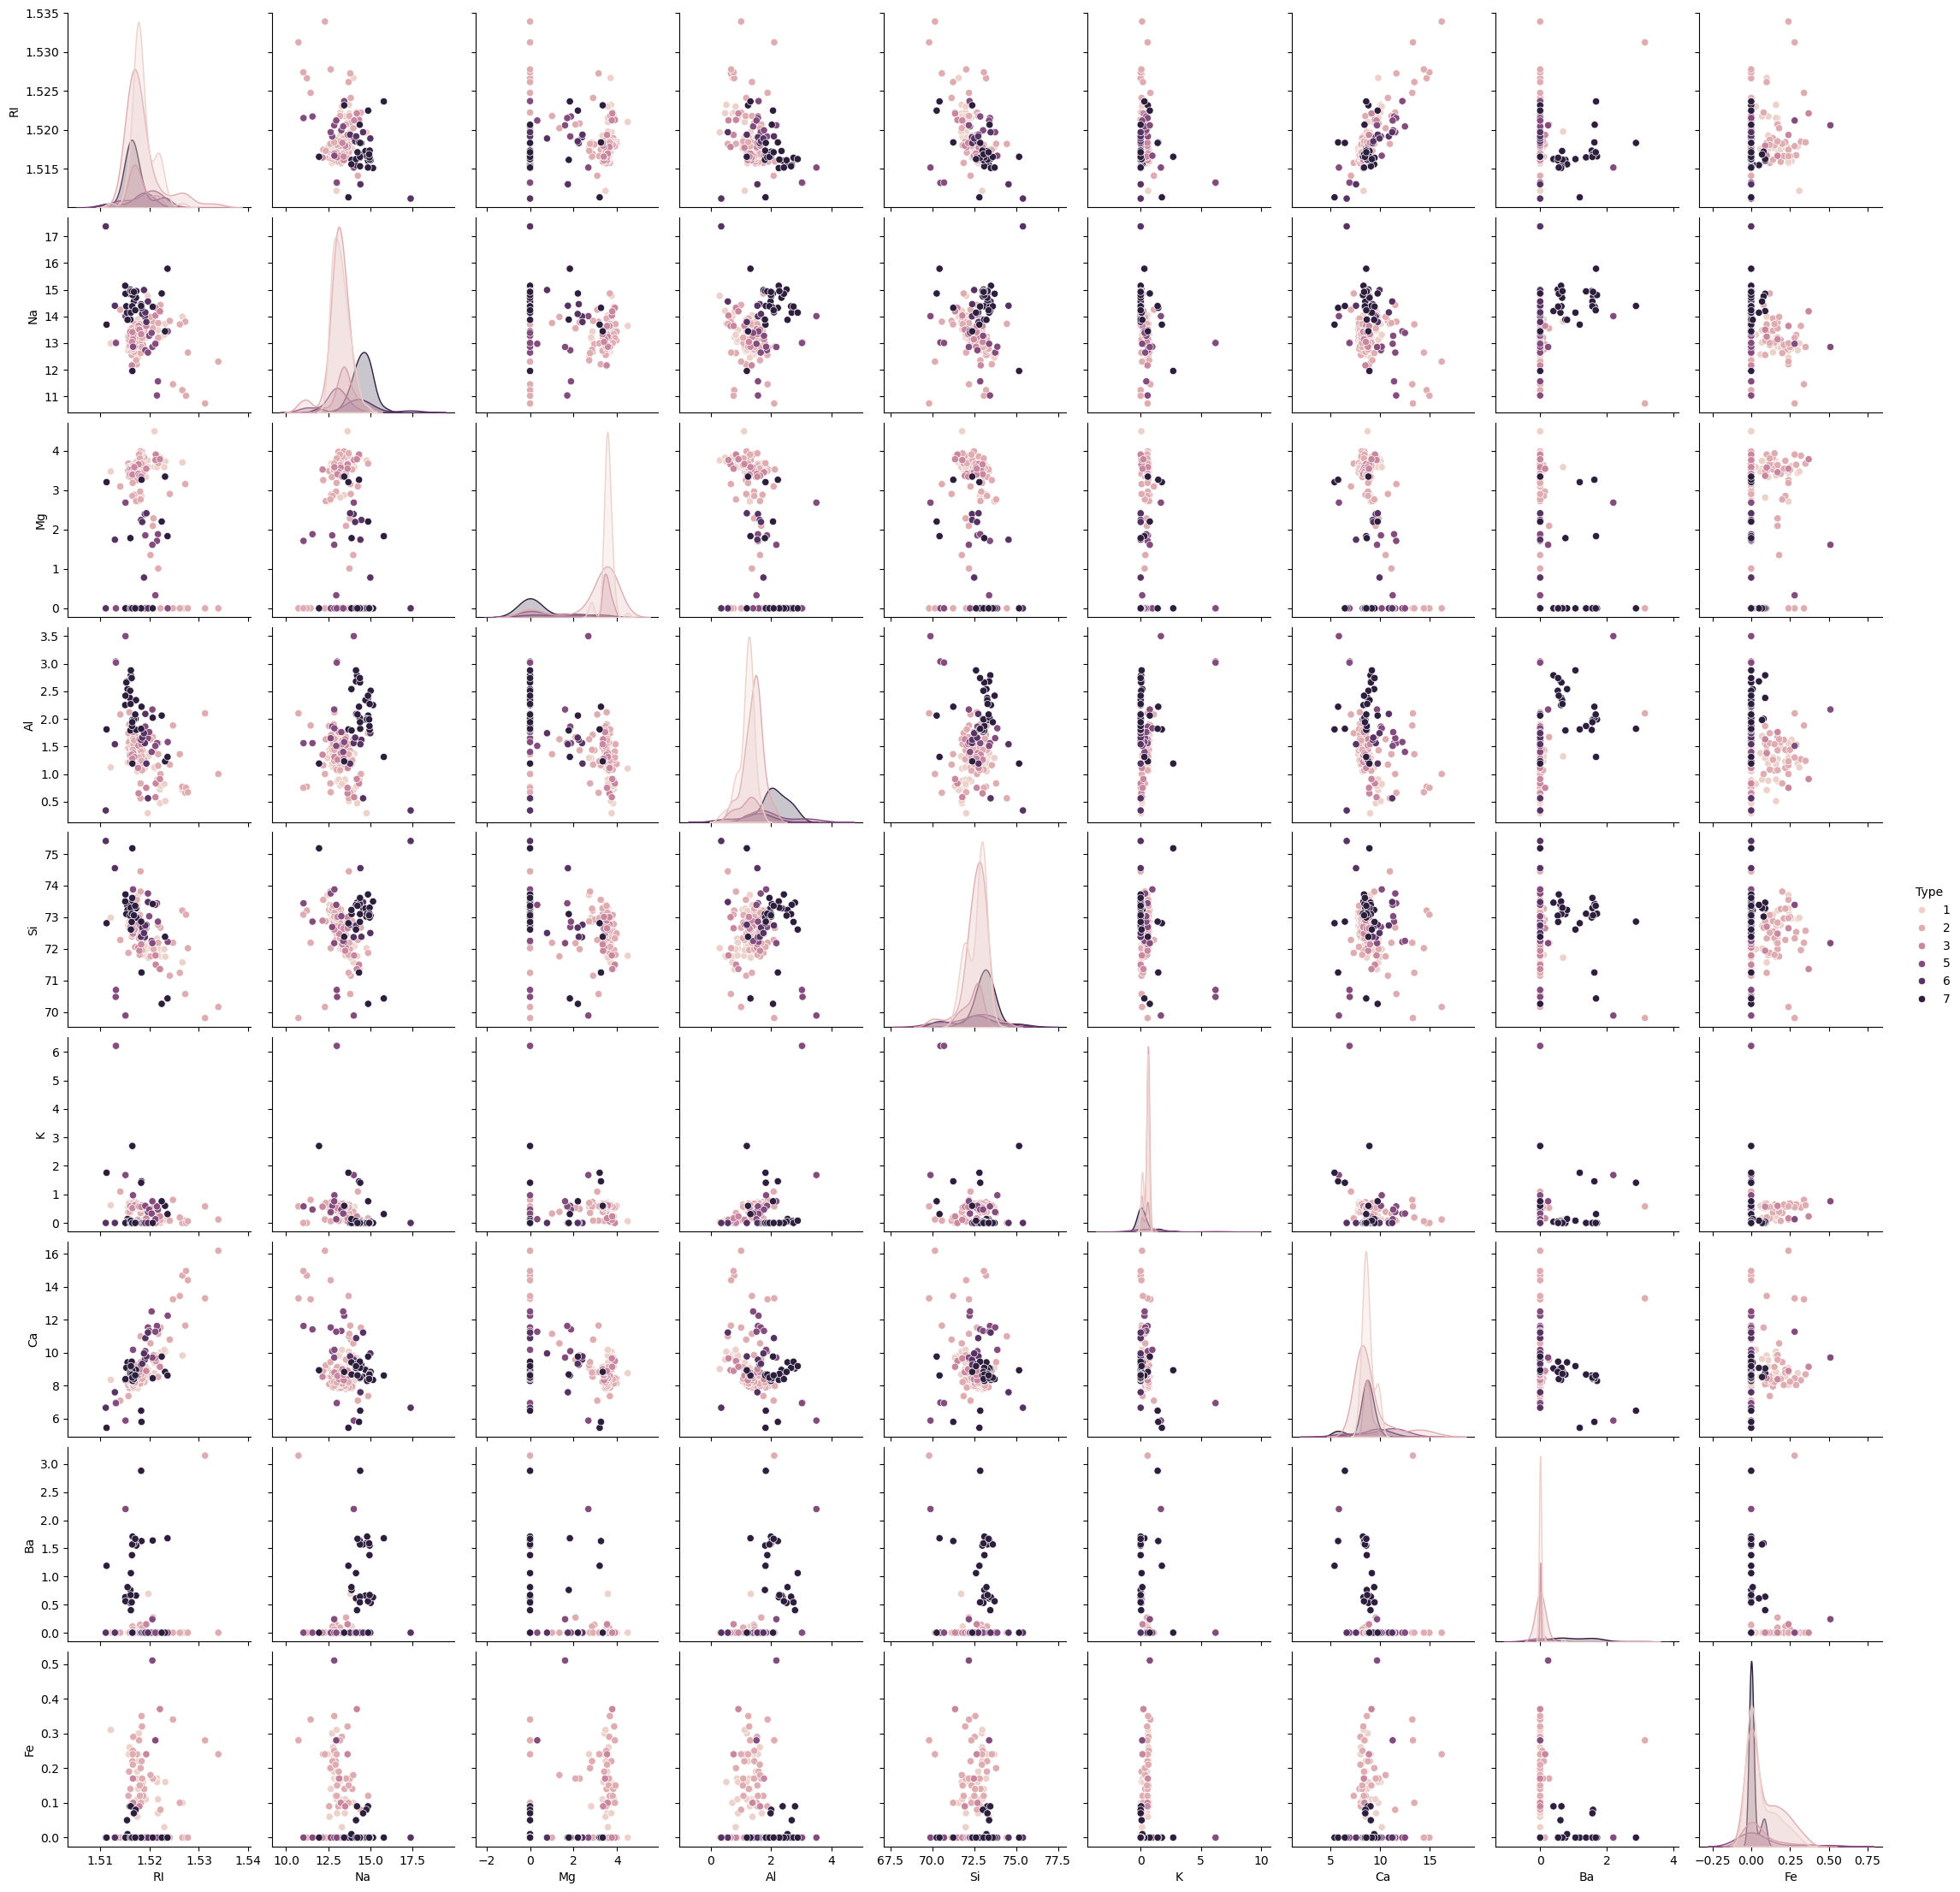

In [40]:
#Pair Plot With Hue (For Target Column)
sns.pairplot(df, hue='Type')
plt.show()

# 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [27]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

The dataset required no missing value treatment or encoding.

In [41]:
X = df.drop('Type', axis=1)   
y = df['Type']               

In [42]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

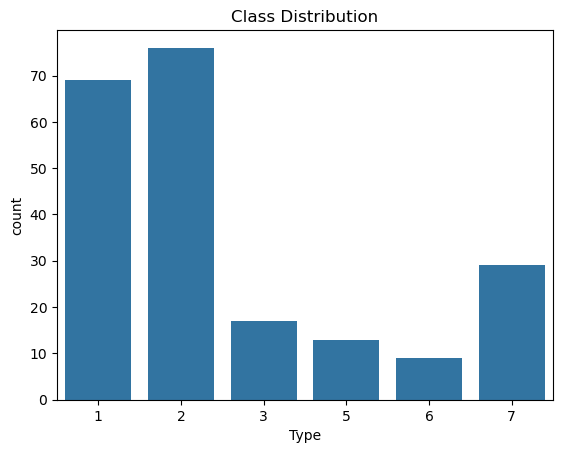

In [45]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


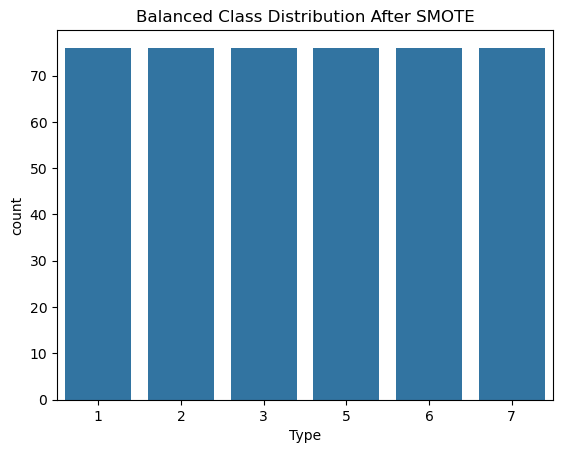

In [47]:
sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()


Now all classes have equal representation

Using of SMOTE(Synthetic Minority Over-sampling Technique):

- Since the dataset showed a significant imbalance among glass types, SMOTE was applied after feature scaling to generate synthetic samples for minority classes. 

- This helped balance the dataset, reduce model bias, and improve classification performance across all classes.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=3,min_samples_leaf=5,random_state=10)

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

print('Training Accuracy : {:.3f}'.format(classifier.score(X_train, Y_train)))
print('Testing Accuracy : {:.3f}'.format(classifier.score(X_test, Y_test)))


Training Accuracy : 0.776
Testing Accuracy : 0.674


The moderate gap between training and testing accuracy indicates reasonable generalization without severe overfitting. Due to the multi-class nature and class imbalance of the dataset, accuracy alone is not sufficient.

In [67]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, Y_train) 

,n_estimators,300
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
y_pred = rf.predict(X_test)

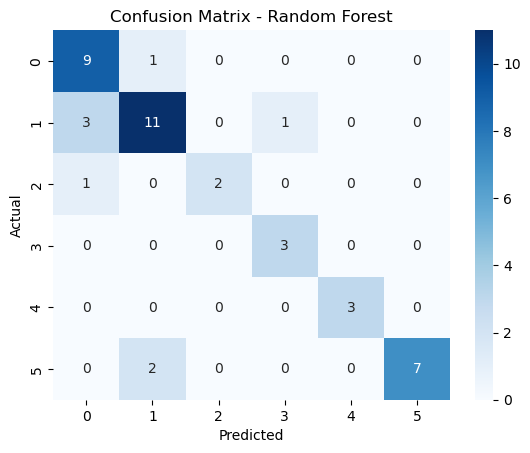

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [70]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        10
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.85        43
weighted avg       0.84      0.81      0.82        43



In [74]:
#GridSearchCV
#GridSearchCV = Parameters + CV + Best Model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20]
}

# GridSearchCV
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='f1_macro'
)

grid.fit(X_train, Y_train)

best_rf = grid.best_estimator_

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


# 5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.

In [81]:
#Bagging
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)

rf_acc = accuracy_score(Y_test, y_pred_rf)
print("Bagging (Random Forest) Accuracy:", rf_acc)


Bagging (Random Forest) Accuracy: 0.813953488372093


Bagging (Bootstrap Aggregating)

- Trains multiple models independently

- Reduces variance

Example: Random Forest

In [84]:
# Booting (AdaBoosting)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5, #Learning Rate = Speed control of learning
    random_state=42
)

ada.fit(X_train, Y_train)

y_pred_ada = ada.predict(X_test)

ada_acc = accuracy_score(Y_test, y_pred_ada)
print("Boosting (AdaBoost) Accuracy:", ada_acc)

Boosting (AdaBoost) Accuracy: 0.627906976744186


In [86]:
#Boosting(Gradient Booting)
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, Y_train)

y_pred_gb = gb.predict(X_test)

gb_acc = accuracy_score(Y_test, y_pred_gb)
print("Boosting (Gradient Boosting) Accuracy:", gb_acc)


Boosting (Gradient Boosting) Accuracy: 0.7441860465116279


Boosting

- Trains models sequentially

- Each new model focuses on previous errors

- Reduces bias

Example: AdaBoost, Gradient Boosting

# 1. Explain Bagging and Boosting methods. How is it different from each other.
Ans:

Bagging improves model performance by reducing variance through independent learning, while Boosting improves accuracy by sequentially correcting errors of previous models. Both are ensemble techniques but differ in learning strategy and error handling.


| Aspect          | Bagging                          | Boosting                             |
| --------------- | -------------------------------- | ------------------------------------ |
| Training style  | Models trained independently     | Models trained sequentially          |
| Data sampling   | Random sampling with replacement | Same data, but with weighted samples |
| Focus           | Reduces variance                 | Reduces bias                         |
| Handling errors | All models treated equally       | More focus on misclassified samples  |
| Overfitting     | Less prone to overfitting        | Can overfit if not tuned             |
| Example         | Random Forest                    | AdaBoost, Gradient Boosting          |


# 2. Explain how to handle imbalance in the data.
Ans:
